# Actividad - Proyecto práctico


> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1: de Antón Santiago, Sara
*   Alumno 2: Sánchez La O, Benjamín C.
*   Alumno 3:






---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [21]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/My Drive/08_MIAR/actividades/proyecto practico"

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [22]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

Colab: making sure  /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico  exists.

Colab: Changing directory to  /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico
/content/gdrive/My Drive/08_MIAR/actividades/proyecto practico
Archivos en el directorio: 
['models']


---
### 1.4. Instalar librerías necesarias

In [23]:
# NO EJECUTAR EN SAGEMAKER (MIRAR EL README PARA CONFIGURAR EL ENTORNO)
# AUNQUE DE FALLOS DE INSTALACIÓN LOS IMPORTS FUNCIONAN
if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.12  #2.8
else:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0

  Cloning https://github.com/Kojoley/atari-py.git to /tmp/pip-req-build-fexoslvk
  Running command git clone --filter=blob:none --quiet https://github.com/Kojoley/atari-py.git /tmp/pip-req-build-fexoslvk
  Resolved https://github.com/Kojoley/atari-py.git to commit 86a1e05c0a95e9e6233c3a413521fdb34ca8a089
  Preparing metadata (setup.py) ... done


---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

In [24]:
# DEFINIR AL PRINCIPIO
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

#### Importar librerías

In [25]:
from __future__ import division

from PIL import Image
import numpy as np
import gym
import os
import glob

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute, Input
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

# AÑADIDO
from tensorflow.keras.layers import Lambda, BatchNormalization
from tensorflow.keras.callbacks import Callback
import json
import pandas as pd
import matplotlib.pyplot as plt
import csv
import pickle

#### Configuración base

In [26]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [27]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

In [28]:
# HIPERPARÁMETROS POR DEFECTO
hiperparametros = {
    "MEMORY_SIZE": 1000000,
    "WARMUP_STEPS": 50000,
    "SCHEDULER_STEPS": 1000000,
    "GAMMA": 0.99,
    "MODEL_UPDATE": 10000,
    "LEARNING_RATE": 0.00025,
    "MODEL_CHECKPOINT_STEPS": 25000,
    "TRAIN_STEPS": 1750000,
    "LOG_INTERVAL": 10000,
    "DELTA_CLIP": 1.0
}

In [29]:
# ROOT PATH PARA LOS MODELOS Y SUS PESOS
if IN_COLAB:
  mount='/content/gdrive'
  drive_root = mount + "/My Drive/08_MIAR/actividades/proyecto practico"
  MODELS_DIR=drive_root+"/models"
else:
  MODELS_DIR="./models"

def get_dirs(model_name="modelo1"):
    WEIGHTS_DIR = os.path.join(MODELS_DIR, model_name, "weights")
    CHECKPOINTS_DIR = os.path.join(MODELS_DIR, model_name, "checkpoints")
    MODEL_DIR = os.path.join(MODELS_DIR, model_name)
    os.makedirs(WEIGHTS_DIR, exist_ok=True)
    os.makedirs(CHECKPOINTS_DIR, exist_ok=True)
    return MODEL_DIR, WEIGHTS_DIR, CHECKPOINTS_DIR

def save_hyperparams(modelo):
    """
    Guarda los hiperparámetros actuales en el fichero JSON.
    """
    hyper_file = os.path.join(MODELS_DIR, modelo, modelo + '.json')
    with open(hyper_file, 'w') as f:
        json.dump(hiperparametros, f, indent=4)
    print(f"[INFO] Hiperparámetros guardados en {hyper_file}")


def load_hyperparams(modelo):
    """
    Actualiza los hiperparámetros definidos en memoria a los del fichero cargado.
    Si el fichero no existe, lo crea con los valores por defecto (hiperparametros).
    """
    hyper_file = os.path.join(MODELS_DIR, modelo, modelo + '.json')

    # Crear el directorio del modelo si no existe
    os.makedirs(os.path.dirname(hyper_file), exist_ok=True)

    if not os.path.exists(hyper_file):
        # Guardar el fichero con los hiperparámetros por defecto
        with open(hyper_file, 'w') as f:
            json.dump(hiperparametros, f, indent=4)

        print(f"[INFO] Fichero de hiperparámetros no encontrado. Creado por defecto en: {hyper_file}")
        params = hiperparametros
    else:
        # El fichero existe: lo leemos
        with open(hyper_file, 'r') as f:
            params = json.load(f)

    # Asignar dinámicamente los valores
    for key, value in params.items():
        globals()[key] = value
        hiperparametros[key] = value  # Actualiza el diccionario en memoria

    print(f"[INFO] Hiperparámetros cargados desde {hyper_file}")

In [60]:
# FUNCIÓN PARA PLOTEAR LOGS DEL TRAINING
def graph_training_csv(csv_path, model_dir, model_name, save_clean_csv=False):
    if not os.path.isfile(csv_path):
        print(f"[ERROR] El archivo '{csv_path}' no existe.")
        return

    try:
        df = pd.read_csv(csv_path, usecols=[0, 1, 2])  # Usa encabezados del archivo
        df.columns = ['episode_jump', 'episode_reward', 'nb_steps']
    except Exception as e:
        print(f"[ERROR] No se pudo leer el CSV: {e}")
        return

    # Ignorar la primera fila de datos (por ejemplo, episodio 1)
    df = df.iloc[1:].reset_index(drop=True)

    # Convertir nb_steps a entero seguro
    df['nb_steps'] = pd.to_numeric(df['nb_steps'], errors='coerce')
    df = df.dropna(subset=['nb_steps'])
    df['nb_steps'] = df['nb_steps'].astype(int)

    fixed_steps = []
    accumulated_steps = 0
    previous_step = df['nb_steps'].iloc[0]

    for s in df['nb_steps']:
      if s < previous_step:
          accumulated_steps += previous_step
          value= s + accumulated_steps
      else:
          if accumulated_steps == 0:
              value = s
          else:
              value = s+ accumulated_steps
      previous_step = s
      fixed_steps.append(value)


    df['fixed_steps'] = fixed_steps
    print(f"[INFO] Último valor en 'fixed_steps': {fixed_steps[-1]}")

    # Graficar
    plt.figure(figsize=(10, 5))
    plt.plot(df['fixed_steps'], df['episode_reward'])
    plt.title(f"{model_name}: Episode Reward vs Steps")
    plt.xlabel("Steps")
    plt.ylabel("Episode Reward")
    plt.grid(True)

    output_path = os.path.join(model_dir, f"{model_name}_episode_reward_fixed_steps.png")
    plt.savefig(output_path)
    print(f"[INFO] Gráfica guardada en: {output_path}")
    plt.show()

    if save_clean_csv:
        clean_csv_path = os.path.join(model_dir, f"{model_name}_cleaned_log_fixed.csv")
        df.to_csv(clean_csv_path, index=False)
        print(f"[INFO] CSV corregido guardado en: {clean_csv_path}")



In [31]:
# CALLBACK CUSTOM DEL LOGGER PARA PODER GUARDAR TODA LA INFO EN UN MISMO FICHERO YA QUE ANTES SE SOBREESCRIBÍA
class EpisodeLoggerCSV(Callback):
    def __init__(self, filepath):
        super().__init__()
        self.filepath = filepath
        self.fields = ['episode', 'episode_reward', 'nb_steps', 'duration']
        self.episode_count = 0
        self.file = None
        self.writer = None

    def on_train_begin(self, logs=None):
        # Abrir el archivo una vez al inicio del entrenamiento
        file_exists = os.path.exists(self.filepath)
        self.file = open(self.filepath, mode='a', newline='')
        self.writer = csv.DictWriter(self.file, fieldnames=self.fields)
        if not file_exists:
            self.writer.writeheader()

    def on_episode_end(self, episode, logs=None):
        self.episode_count += 1
        row = {
            'episode': self.episode_count,
            'episode_reward': logs.get('episode_reward'),
            'nb_steps': logs.get('nb_steps'),
            'duration': logs.get('duration')
        }
        self.writer.writerow(row)
        self.file.flush()  # Asegura que se escriba en disco
        #print(f"[Log CSV] Episodio {self.episode_count} → Recompensa: {row['episode_reward']}")

    def on_train_end(self, logs=None):
        # Cerrar el archivo al final
        if self.file:
            self.file.close()

In [32]:
# CALLBACK CUSTOM PARA GUARDAR LOS CHECKPOINTS CON EL NOMBRE BIEN CUANDO SE REINICIA EL ENTRENAMIENTO Y LA MEMORIA
class AccumulatedCheckpoint(Callback):
    def __init__(self, base_path, env_name, interval, initial_step=0):
        super().__init__()
        self.base_path = base_path
        self.weights_path = os.path.join(base_path, f'dqn_{env_name}_weights_{{step}}.h5f')
        self.memory_path= os.path.join(base_path,'memory.pkl')
        self.policy_state_path = os.path.join(base_path, 'policy.json')
        self.interval = interval
        self.total_steps = initial_step
        print(f"Callback iniciado desde paso {self.total_steps}")

    def on_step_end(self, step, logs={}):
        self.total_steps += 1
        if self.total_steps % self.interval == 0:
            base = self.base_path.format(step=self.total_steps)

            # Guardar pesos del modelo
            weights_path = self.weights_path
            weights_path = self.weights_path.format(step=self.total_steps)
            self.model.save_weights(weights_path, overwrite=True)
            print(f"\n[Checkpoint] Pesos guardados en: {weights_path}")

            # Guardar memoria de repetición
            memory_path = self.memory_path
            temp_path = memory_path + ".tmp"

            with open(temp_path, "wb") as f:
                pickle.dump(self.model.memory, f)

            # Solo si guardar ha ido bien
            os.replace(temp_path, memory_path)
            print(f"\n[Checkpoint] Memoria guardada de forma segura en: {memory_path}")

In [33]:
# FUNCIÓN PARA CARGAR EL ÚLTMO CHECKPOINT DETECTADO
def load_last_checkpoint(dqn):
  # Buscar todos los checkpoints por su archivo .index
  pattern = os.path.join(CHECKPOINTS_DIR, f'dqn_{env_name}_weights_*.h5f.index')
  checkpoints = glob.glob(pattern)

  # Valor por defecto si no se encuentra checkpoint
  last_checkpoint_steps = 0

  if checkpoints:
      # Extraer el número de paso del nombre
      def extract_step(filename):
          try:
              name = os.path.basename(filename)
              step_part = name.split('_weights_')[1].replace('.h5f.index', '')
              return int(step_part)
          except:
              return -1

      # Seleccionar el checkpoint con mayor número de pasos
      latest_index = max(checkpoints, key=extract_step)

      # Quitar la extensión .index para obtener el nombre base
      latest_checkpoint = latest_index.replace('.index', '')

      print(f"[DQN] Cargando último checkpoint: {latest_checkpoint}")
      dqn.load_weights(latest_checkpoint)

      # Aquí extraemos los pasos acumulados
      last_checkpoint_steps = extract_step(latest_index)
  else:
      print("[DQN] No se encontró ningún checkpoint, entrenamiento desde cero.")
  return dqn, last_checkpoint_steps

In [34]:
# FUNCIÓN QUE PERMITE AJUSTAR LOS PARÁMETROS DE LA POLICY PARA QUE EL ENTRENAMIENTO SE REAUNDE POR DONDE TOCA
# SI NO POR DEFECTO COMENZARÍA EN EL VALOR MÁXIMO DE EPSILON
def adjust_policy_params(scheduler_steps, train_steps, current_step, value_max=1.0, value_min=0.1):
    """
    Ajusta dinámicamente los parámetros de LinearAnnealedPolicy para reanudar la exploración desde el punto correcto.

    Args:
        scheduler_steps (int): Número de pasos que define la duración del decaimiento de eps.
        train_steps (int): Número total de pasos planeados para el entrenamiento.
        current_step (int): Paso actual o recuperado del checkpoint.
        value_max (float): Valor inicial deseado de eps.
        value_min (float): Valor mínimo deseado de eps.

    Returns:
        tuple: (value_max_ajustado, value_min, scheduler_steps_restantes)
    """
    if current_step >= scheduler_steps:
        # Ya se alcanzó el mínimo, mantenerlo constante
        return value_min, value_min, 1  # eps se queda fijo

    # Calcular epsilon actual desde el punto alcanzado
    frac = current_step / scheduler_steps
    current_eps = value_max - (value_max - value_min) * frac

    # Pasos restantes para completar el scheduler
    steps_remaining = scheduler_steps - current_step
    return current_eps, value_min, steps_remaining

In [35]:
# FUNCIÓN PARA CARGAR LA MEMORIA Y EL NÚMERO DE PASOS DEL MODELO
def get_memory_and_last_steps():
  pattern = os.path.join(CHECKPOINTS_DIR, f'dqn_{env_name}_weights_*.h5f.index')
  checkpoints = glob.glob(pattern)
  last_checkpoint_steps = 0
  memory = None

  if checkpoints:
      def extract_step(filename):
          try:
              name = os.path.basename(filename)
              step_part = name.split('_weights_')[1].replace('.h5f.index', '')
              return int(step_part)
          except:
              return -1

      # Encontrar el último checkpoint
      latest_index = max(checkpoints, key=extract_step)
      latest_checkpoint = latest_index.replace('.index', '')
      last_checkpoint_steps = extract_step(latest_index)
      print(f"Último step de checkpoint: {last_checkpoint_steps}")

      # Cargar memoria
      memory_path = os.path.join(CHECKPOINTS_DIR, "memory.pkl")
      if os.path.exists(memory_path):
          with open(memory_path, "rb") as f:
              memory = pickle.load(f)
          print(f"Memoria cargada desde: {memory_path}")
      else:
          print("No se encontró memoria para este checkpoint.")

  else:
      print("No se encontró ningún checkpoint, entrenamiento desde cero.")
  return memory, last_checkpoint_steps

# MODELO 1

### Red neuronal basada en el paper: https://arxiv.org/pdf/1312.5602

En el paper se implementa una red neuronal convolucional que tiene de entrada una pila de cuatro imágenes en escala de grises de 84×84. La red tiene de tres capas convolucionales: la 1ª con 32 filtros de 8×8 y un stride 4, la 2ª con 64 filtros de 4×4 y un stride 2, y la 3ª con 64 filtros de 3×3 y stride 1, todas con activación ReLU. Depués, las salidas se aplanan y se pasan por una una capa densa de 512 neuronas con activación ReLU, seguida de una capa de salida lineal con una neurona por cada acción posible, que son los valores Q predichos.

#### Con las siguientes modificaciones:
Se ha incorporado la normalización de las imágenes al rango 0-1, que como se ha visto en redes neuronales puede estabilizar mejor el entrenamiento. También, se han añadido capas de BatchNormalization porque también se ha estudiado en la misma asgnatura que acelera la convergencia y reduce el riesgo de que exploten los gradientes.

## DQN
DQN implementado basándose en el github oficial de keras rl2: https://github.com/inarikami/keras-rl2/tree/master

1. Implementación de la red neuronal

In [36]:
# CREACIÓN DEL MODELO
model_name="modelo1"

model = Sequential()

input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

# Rorganizar las imágenes para que el window length quede en la dimensión de los canales
if K.image_data_format() == 'channels_last':
    model.add(Permute((2, 3, 1), input_shape=input_shape))  # (4, H, W) → (H, W, 4)
elif K.image_data_format() == 'channels_first':
    model.add(Permute((1, 2, 3), input_shape=input_shape))
else:
    raise RuntimeError('Unknown image_dim_ordering.')

# Normalizar los valores de píxeles
model.add(Lambda(lambda x: x / 255.0))

# Primera capa convolucional
model.add(Convolution2D(32, (8, 8), strides=(4, 4)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Segunda
model.add(Convolution2D(64, (4, 4), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Tercera
model.add(Convolution2D(64, (3, 3), strides=(1, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Densas
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

# Salida con el número de acciones
model.add(Dense(nb_actions))
model.add(Activation('linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute_1 (Permute)         (None, 84, 84, 4)         0         
                                                                 
 lambda_1 (Lambda)           (None, 84, 84, 4)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        8224      
                                                                 
 batch_normalization_3 (Batc  (None, 20, 20, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 20, 20, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 64)          32832     
                                                      

2. Implementación de la solución DQN

In [37]:
# GENERACIÓN O CARGA MODELO
MODEL_DIR, WEIGHTS_DIR, CHECKPOINTS_DIR = get_dirs(model_name)
# save_hyperparams(HYPERPARAMETERS_DIR, filename=model_name+".json")
load_hyperparams(model_name)

[INFO] Hiperparámetros cargados desde /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo1/modelo1.json


In [38]:
# DEFINICIÓN DE LA POLICY

memory, last_checkpoint_steps=get_memory_and_last_steps()

value_max, value_min, new_scheduler_steps = adjust_policy_params(
    scheduler_steps=SCHEDULER_STEPS,
    train_steps=TRAIN_STEPS,
    current_step=last_checkpoint_steps
)
if not memory:
  memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
  print("Memoria inicializada de 0")

print(f"Valores de la policy: value_min={value_min}, value_max={value_max}, scheduler_steps={new_scheduler_steps}")

processor = AtariProcessor()

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=value_max, value_min=value_min,
                              value_test=.05,
                              nb_steps=new_scheduler_steps)
#policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
#                              value_max=1., value_min=.1,
#                              value_test=.05,
#                              nb_steps=SCHEDULER_STEPS)

Último step de checkpoint: 1750000
Memoria cargada desde: /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo1/checkpoints/memory.pkl
Valores de la policy: value_min=0.1, value_max=0.1, scheduler_steps=1


In [39]:
# CREACIÓN DEL AGENTE DQN
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,
               gamma=GAMMA,
               target_model_update=MODEL_UPDATE,
               train_interval=4,
               delta_clip=DELTA_CLIP)

if IN_COLAB:
    # Parche para evitar el error 'get_updates' que ya no existe
    def patched_get_updates(self, loss, params):
        return []
    Adam.get_updates = patched_get_updates

dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

In [40]:
# DEFINICIÓN DE LOS NOMBRES DE FICHEROS DE SALIDA
weights_filename = os.path.join(WEIGHTS_DIR, 'dqn_{}_weights_{}.h5f'.format(env_name, model_name))
checkpoint_weights_filename = os.path.join(CHECKPOINTS_DIR, 'dqn_' + env_name + '_weights_{step}.h5f')
log_filename =os.path.join(MODEL_DIR, 'dqn_{}_log_{}.json'.format(env_name, model_name))
log_csv_path = os.path.join(MODEL_DIR, f'{model_name}_training_log.csv')


In [41]:
# CARGAR PESOS DEL ÚLTIMO CHECKPOINT SI EXISTE
dqn, last_checkpoint_steps = load_last_checkpoint(dqn)
# CREAR CALLBACKS CUSTOMIZADOS QUE GUARDAN BIEN LOS CHECKPOINTS Y LOGS DEL TRAINING
checkpoint_callback = AccumulatedCheckpoint(
      base_path=CHECKPOINTS_DIR,
      env_name=env_name,
      interval=MODEL_CHECKPOINT_STEPS,
      initial_step=last_checkpoint_steps
  )
callbacks = [checkpoint_callback]
dqn.step = last_checkpoint_steps
callbacks += [EpisodeLoggerCSV(log_csv_path)]
#callbacks =  [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=MODEL_CHECKPOINT_STEPS)]
#callbacks += [FileLogger(log_filename, interval=100)] # Gives some errors

[DQN] Cargando último checkpoint: /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo1/checkpoints/dqn_SpaceInvaders-v0_weights_1750000.h5f
Callback iniciado desde paso 1750000


In [20]:
# ENTRENAR DQN
if TRAIN_STEPS>0:
  dqn.fit(env, callbacks=callbacks, nb_steps=TRAIN_STEPS-last_checkpoint_steps, log_interval=LOG_INTERVAL, visualize=False)
  dqn.save_weights(weights_filename, overwrite=True)

Training for 1000000 steps ...
Interval 1 (0 steps performed)
   12/10000 [..............................] - ETA: 45s - reward: 0.0000e+00  

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 45s 4ms/step - reward: 0.0190
12 episodes - episode_reward: 15.000 [8.000, 21.000] - ale.lives: 1.976

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 47s 5ms/step - reward: 0.0168
11 episodes - episode_reward: 14.727 [6.000, 20.000] - ale.lives: 1.993

Interval 3 (20000 steps performed)
 4997/10000 [=============>................] - ETA: 23s - reward: 0.0190
[Checkpoint] Pesos guardados en: /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo1/checkpoints/dqn_SpaceInvaders-v0_weights_775000.h5f

[Checkpoint] Memoria guardada de forma segura en: /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo1/checkpoints/memory.pkl
10000/10000 [==============================] - 111s 11ms/step - reward: 0.0194
14 episodes - episode_reward: 14.429 [9.000, 22.000] - ale.lives: 1.971

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 46s 5ms/

In [44]:
# Testing part to calculate the mean reward
weights_filename =os.path.join(WEIGHTS_DIR, 'dqn_{}_weights_{}.h5f'.format(env_name, model_name))
#weights_filename=latest_checkpoint
#print(weights_filename)
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 1: reward: 19.000, steps: 722
Episode 2: reward: 19.000, steps: 724
Episode 3: reward: 19.000, steps: 717
Episode 4: reward: 19.000, steps: 718
Episode 5: reward: 19.000, steps: 709
Episode 6: reward: 18.000, steps: 721
Episode 7: reward: 19.000, steps: 712
Episode 8: reward: 19.000, steps: 724
Episode 9: reward: 19.000, steps: 729
Episode 10: reward: 19.000, steps: 718


[INFO] Último valor en 'fixed_steps': 1273947
[INFO] Gráfica guardada en: /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo1/modelo1_episode_reward_fixed_steps.png


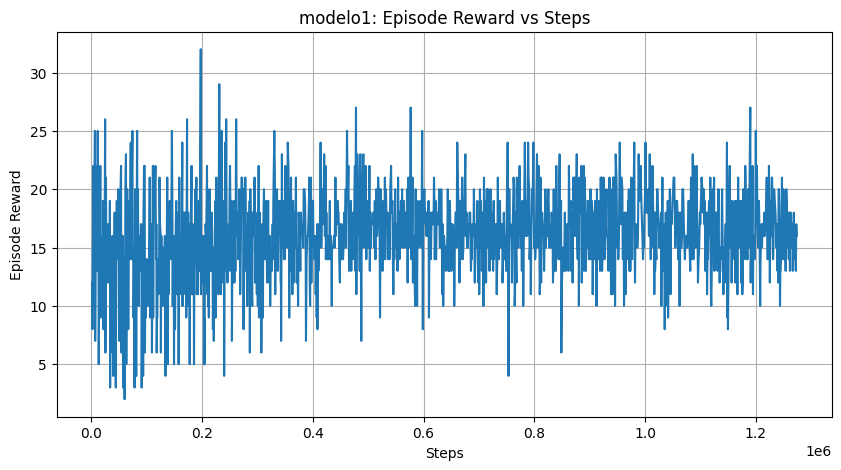

In [61]:
 graph_training_csv(log_csv_path, MODEL_DIR, model_name)

# MODELO 2

### Red neuronal basada en el paper: [https://arxiv.org/abs/1511.06581](https://arxiv.org/abs/1511.06581)

**Dueling Network Architectures for Deep Reinforcement Learning**
**Autores:** Ziyu Wang, Tom Schaul, Matteo Hessel, Hado van Hasselt, Marc Lanctot, Nando de Freitas.
**Año de publicación:** 2015

El término "Duel DQN" o "Dueling DQN" (DQN con redes en duelo) se refiere a una arquitectura específica de la red neuronal dentro del marco de DQN (o Double DQN, como estamos discutiendo). No son "redes separadas" en el sentido de la red online y la red target, sino una **modificación a la capa de salida de una única red Q** que luego se duplica para formar la red online y la red target.

La idea principal de Dueling DQN es que la función Q se puede descomponer en dos componentes:

1.  **Valor del estado (V(s))**: Cuánto de bueno es estar en un estado dado, independientemente de la acción.
2.  **Ventaja de la acción (A(s, a))**: Cuánto mejor (o peor) es tomar una acción específica en ese estado en comparación con el promedio de las acciones.

Así, la función Q se estima como:

$Q(s, a; \theta, \alpha, \beta) = V(s; \theta, \beta) + (A(s, a; \theta, \alpha) - \frac{1}{|\mathcal{A}|} \sum_{a'} A(s, a'; \theta, \alpha))$

Donde:
* $\theta$: Parámetros de las capas convolucionales (comunes a ambos flujos).
* $\alpha$: Parámetros de la capa densa de ventaja.
* $\beta$: Parámetros de la capa densa de valor.
* $|\mathcal{A}|$: Número de acciones.

Esto permite que la red aprenda la importancia de los estados por separado de la importancia de cada acción.

El paper original donde se introdujo la arquitectura Dueling Network (la base de Dueling DQN) es:

**Título:** **Dueling Network Architectures for Deep Reinforcement Learning**
**Autores:** Ziyu Wang, Tom Schaul, Matteo Hessel, Hado van Hasselt, Marc Lanctot, Nando de Freitas.
**Año de publicación:** 2015
**Enlace (arXiv):** [https://arxiv.org/abs/1511.06581](https://arxiv.org/abs/1511.06581)

Este es el documento fundamental que describe la idea de descomponer la función de valor Q en un valor de estado ($V(s)$) y una función de ventaja de acción ($A(s,a)$), y cómo combinarlos en una única arquitectura de red neuronal. Es un paper de Google DeepMind y ha sido muy influyente en el campo del Aprendizaje por Refuerzo Profundo.

Te recomiendo leerlo para entender a fondo la intuición detrás de la arquitectura y sus beneficios.

Describir la NN

#### Con las siguientes modificaciones:

Modificaciones...

## DQN
DQN implementado basándose en ...

1. Implementación de la red neuronal

In [ ]:
model_name = "modelo2"

# --- 2. Construcción del Modelo Dueling DQN con API Funcional ---

# Define la forma de entrada para el modelo
input_layer_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

# Definimos la capa de entrada del modelo
inputs = Input(shape=input_layer_shape, name='Input_Frames')

# Reorganizar las imágenes para que el window length quede en la dimensión de los canales
if K.image_data_format() == 'channels_last':
    x = Permute((2, 3, 1), name='Permute_Channels')(inputs)
elif K.image_data_format() == 'channels_first':
    # Si ya es (BATCH, CHANNELS, H, W), no necesitamos permutar si INPUT_SHAPE ya incluye el canal.
    # Pero si INPUT_SHAPE es solo (H,W) y WINDOW_LENGTH es el canal, Permute es correcto.
    # Si la entrada es (WINDOW_LENGTH, H, W) y queremos (WINDOW_LENGTH, H, W), esta línea es redundante
    # o puede causar problemas si Keras espera (CHANNELS, H, W)
    # Sin embargo, para consistencia con tu original:
    x = Permute((1, 2, 3), name='Permute_Channels')(inputs) # Asumiendo que WINDOW_LENGTH es el primer "canal"
else:
    raise RuntimeError('Unknown image_data_format.')

# Normalizar los valores de píxeles
x = Lambda(lambda x: x / 255.0, name='Normalize_Pixels')(x)

# Capas convolucionales
# Conv1
x = Convolution2D(32, (8, 8), strides=(4, 4), name='Conv1')(x)
x = BatchNormalization(name='BN1')(x)
x = Activation('relu', name='ReLU1')(x)

# Conv2
x = Convolution2D(64, (4, 4), strides=(2, 2), name='Conv2')(x)
x = BatchNormalization(name='BN2')(x)
x = Activation('relu', name='ReLU2')(x)

# Conv3
x = Convolution2D(64, (3, 3), strides=(1, 1), name='Conv3')(x)
x = BatchNormalization(name='BN3')(x)
x = Activation('relu', name='ReLU3')(x)

# Aplanar la salida de las capas convolucionales antes de las capas densas
flattened_output = Flatten(name='Flatten_Layer')(x)

# --- Ramificación Dueling DQN ---

# 1. Stream para la estimación del Valor (V(s))
# Una capa densa seguida de una salida de un solo valor para el estado
value_stream = Dense(512, name='Value_Dense')(flattened_output)
value_stream = Activation('relu', name='Value_ReLU')(value_stream)
value = Dense(1, activation='linear', name='Value_Output')(value_stream) # Salida de valor escalar

# 2. Stream para la estimación de la Ventaja (A(s,a))
# Una capa densa seguida de salidas para cada acción
advantage_stream = Dense(512, name='Advantage_Dense')(flattened_output)
advantage_stream = Activation('relu', name='Advantage_ReLU')(advantage_stream)
advantage = Dense(nb_actions, activation='linear', name='Advantage_Output')(advantage_stream) # Salida de ventaja para cada acción

# Combinación de Valor y Ventaja para obtener Q(s,a)
# Q(s,a) = V(s) + (A(s,a) - mean(A(s,a')))
# Utilizamos una capa Lambda para esta operación.
# K.mean(a[1], axis=1, keepdims=True) calcula el promedio de las ventajas para todas las acciones
# `keepdims=True` asegura que la forma se mantenga compatible para la resta
output_q_values = Lambda(lambda a: a[0] + (a[1] - K.mean(a[1], axis=1, keepdims=True)),
                         output_shape=(nb_actions,), name='Q_Value_Combined')([value, advantage])

# Crea el modelo final con las entradas y salidas definidas
model = Model(inputs=inputs, outputs=output_q_values, name=model_name)

# Muestra un resumen de la arquitectura de la red
print(f"\nResumen de la Red Dueling DQN: {model_name}")
model.summary()


Resumen de la Red Dueling DQN: modelo2
Model: "modelo2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Frames (InputLayer)      [(None, 4, 84, 84)]  0           []                               
                                                                                                  
 Permute_Channels (Permute)     (None, 84, 84, 4)    0           ['Input_Frames[0][0]']           
                                                                                                  
 Normalize_Pixels (Lambda)      (None, 84, 84, 4)    0           ['Permute_Channels[0][0]']       
                                                                                                  
 Conv1 (Conv2D)                 (None, 20, 20, 32)   8224        ['Normalize_Pixels[0][0]']       
                                                    

2. Implementación de la solución DQN

In [ ]:
# GENERACIÓN O CARGA MODELO
MODEL_DIR, WEIGHTS_DIR, CHECKPOINTS_DIR = get_dirs(model_name)
load_hyperparams(model_name)

# Añado los hiperparametros para el modelo dueling
hiperparametros["ENABLE_DOUBLE_DQN"] = True
hiperparametros["ENABLE_DUELING_NETWORK"] = False

# Guardar cambios
save_hyperparams(model_name)

# Volver a cargar para crear las variables globales nuevas
load_hyperparams(model_name)

[INFO] Hiperparámetros cargados desde /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo2/modelo2.json
[INFO] Hiperparámetros guardados en /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo2/modelo2.json
[INFO] Hiperparámetros cargados desde /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo2/modelo2.json


In [ ]:
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1,
                              value_test=.05,
                              nb_steps=SCHEDULER_STEPS)

In [ ]:
dqn = DQNAgent(model=model,
                     nb_actions=nb_actions,
                     policy=policy,
                     memory=memory,
                     processor=processor,
                     nb_steps_warmup=WARMUP_STEPS,
                     gamma=GAMMA,
                     target_model_update=MODEL_UPDATE,
                     train_interval=4,          # Entrena cada 4 pasos de entorno
                     delta_clip=DELTA_CLIP,            # Clipping del error para mejorar la estabilidad
                     enable_double_dqn=True,    # Activa Double DQN
                     enable_dueling_network=False) # Deja esto en False porque ya la construimos manualmente

if IN_COLAB:
    # Parche para evitar el error 'get_updates' que ya no existe
    def patched_get_updates(self, loss, params):
        return []
    Adam.get_updates = patched_get_updates

# Compilo con el agente el modelo
dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

In [ ]:
weights_filename = os.path.join(WEIGHTS_DIR, 'dqn_{}_weights_{}.h5f'.format(env_name, model_name))
checkpoint_weights_filename = os.path.join(CHECKPOINTS_DIR, 'dqn_' + env_name + '_weights_{step}.h5f')
log_filename =os.path.join(MODEL_DIR, 'dqn_{}_log_{}.json'.format(env_name, model_name))
log_csv_path = os.path.join(MODEL_DIR, f'{model_name}_training_log.csv')


In [ ]:
last_checkpoint_steps = load_last_checkpoint()

# Custom callback for checkpoints to restart from the last one
checkpoint_callback = AccumulatedCheckpoint(
      base_path=checkpoint_weights_filename,
      interval=MODEL_CHECKPOINT_STEPS,
      initial_step=last_checkpoint_steps
  )
callbacks = [checkpoint_callback]
dqn.step = last_checkpoint_steps
print("Steps que llevaba el modelo entrenado:", dqn.step)
callbacks += [EpisodeLoggerCSV(log_csv_path)]

[DQN] Cargando último checkpoint: /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo2/checkpoints/dqn_SpaceInvaders-v0_weights_50000.h5f
Callback iniciado desde paso 50000
Steps que llevaba el modelo entrenado: 50000


In [ ]:
# ENTRENAR DUEL DQN
if TRAIN_STEPS>0:
  dqn.fit(env, callbacks=callbacks, nb_steps=TRAIN_STEPS-last_checkpoint_steps, log_interval=LOG_INTERVAL, visualize=False)
  dqn.save_weights(weights_filename, overwrite=True)

Training for 1700000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 71s 7ms/step - reward: 0.0141
14 episodes - episode_reward: 9.500 [6.000, 15.000] - ale.lives: 2.090

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 70s 7ms/step - reward: 0.0130
15 episodes - episode_reward: 8.600 [4.000, 17.000] - ale.lives: 2.098

Interval 3 (20000 steps performed)
 4999/10000 [=============>................] - ETA: 27s - reward: 0.0120
[Checkpoint] Guardado en paso 75000: /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo2/checkpoints/dqn_SpaceInvaders-v0_weights_75000.h5f
10000/10000 [==============================] - 56s 6ms/step - reward: 0.0138
14 episodes - episode_reward: 10.000 [5.000, 16.000] - ale.lives: 2.037

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 59s 6ms/step - reward: 0.0142
14 episodes - episode_reward: 10.643 [3.000, 27.000] - ale.lives: 2.1

In [ ]:
# Testing part to calculate the mean reward
weights_filename =os.path.join(WEIGHTS_DIR, 'dqn_{}_weights_{}.h5f'.format(env_name, model_name))
dqn.load_weights(latest_checkpoint)
dqn.test(env, nb_episodes=10, visualize=False)

/content/gdrive/My Drive/08_MIAR/actividades/proyecto practico/models/modelo1/checkpoints/dqn_SpaceInvaders-v0_weights_275000.h5f
Testing for 10 episodes ...
Episode 1: reward: 16.000, steps: 1010
Episode 2: reward: 11.000, steps: 881
Episode 3: reward: 11.000, steps: 805
Episode 4: reward: 23.000, steps: 1452
Episode 5: reward: 17.000, steps: 974
Episode 6: reward: 15.000, steps: 1015
Episode 7: reward: 17.000, steps: 955
Episode 8: reward: 23.000, steps: 1492
Episode 9: reward: 17.000, steps: 962
Episode 10: reward: 12.000, steps: 856


In [ ]:
 graph_training_csv(log_csv_path, MODEL_DIR, model_name, 'mean_q')

 La variable 'mean_q' no está en el CSV. Columnas disponibles: ['1', '6.0', '420', 'Unnamed: 3']


3. Justificación de los parámetros seleccionados y de los resultados obtenidos

---